In [69]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import math
import random as random
from sklearn.metrics.pairwise import euclidean_distances
from collections import defaultdict
from itertools import compress
from itertools import product

In [74]:
def plot_points(X, y):

    plt.figure(figsize=(10, 8))
    for i in range(2):
        plt.scatter(X[y == i, 0], X[y == i, 1], label=f'Class {i}', alpha=0.7, s=300)

    for i,x in enumerate(X):
        # Add index text inside the point
        plt.text(x[0], x[1], str(i), fontsize=10, ha='center', va='center', color='white',
                 bbox=dict(facecolor='none', edgecolor='none', boxstyle='round,pad=0.2'))

    plt.legend()
    plt.axis('equal')
    plt.grid(True)
    plt.show()

def plot_noise(X, y, noise_indices):
    
    num_points = len(X)

    noise_indices = np.array(noise_indices)

    print(f"Noise points: {len(noise_indices)}")

    colors = ['magenta', 'green']

    plt.figure(figsize=(10, 8))

    for i in range(2):  # Assuming 2 classes
        # All points of class i (faded)
        plt.scatter(X[y == i, 0], X[y == i, 1], label=f'Class {i}', alpha=0.3, color=colors[i], s=300)

    # Noise points (cross)
    if len(noise_indices) > 0:
        plt.scatter(X[noise_indices, 0], X[noise_indices, 1], color='red', marker='x', s=200, label='Noise')

    # Index labels
    for i, x in enumerate(X):
        plt.text(x[0], x[1], str(i), fontsize=10, ha='center', va='center', color='white',
                 bbox=dict(facecolor='none', edgecolor='none', boxstyle='round,pad=0.2'))

    plt.axis('equal')
    plt.title('Noise Points')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_local_sets(X, y, kept_indices=None):
    '''
    Plots a scatter plot with embeddings and their local sets. The local set of an instance e is the set of instances 
    whose distance to e is smaller than the distance between e and its nearest ennemy.
    '''

    if(kept_indices is None):
        kept_indices = np.arange(len(y), dtype=int) # take all instances
    else:
        kept_indices = np.array(kept_indices)

    X_filtered = X[kept_indices]
    y_filtered = y[kept_indices]

    distances_filtered = euclidean_distances(X_filtered, X_filtered)
    NEs_filtered = ne_dist(y_filtered, distances_filtered)
    
    fig, ax = plt.subplots(figsize=(10, 10))

    color = []
    
    for i in range(2): # number of classes
        r = random.random() 
        b = random.random() 
        g = random.random() 
  
        color.append((r, g, b))

        kept_mask = (np.isin(np.arange(len(X)), kept_indices)) & (y == i) 
        plt.scatter(X[kept_mask, 0], X[kept_mask, 1], label=f'Class {i}', s=300, alpha=0.7,color=color[i])

    for i, real_index in enumerate(kept_indices):
        
        # Add index text inside the point
        plt.text(X[real_index][0], X[real_index][1], str(real_index), fontsize=10, ha='center', va='center', color='white',
                 bbox=dict(facecolor='none', edgecolor='none', boxstyle='round,pad=0.2'))
        
        # Add circles for Local Sets
        radius = math.dist(X[real_index], X[NEs_filtered[i]])
        LSR_normalized= 1/(1 + np.exp(-radius)) # regulate opacity with the LSR

        if y[real_index] == 0:
            circle = plt.Circle(X[real_index], radius, color=color[0], fill=False, linewidth=LSR_normalized, alpha=LSR_normalized)
            ax.add_patch(circle)
        else:
            circle = plt.Circle(X[real_index], radius, color=color[1], fill=False, linewidth=LSR_normalized, alpha=LSR_normalized)
            ax.add_patch(circle)

    plt.legend()
    plt.grid(True)
    ax.set_aspect('equal')

    plt.show()

def plot_borders(X, y, kept_indices, border_indices):

    X_filtered = X[kept_indices]
    y_filtered = y[kept_indices]

    num_points = len(X)
    num_points_filtered = len(X_filtered)

    border_indices = np.array(border_indices)

    print(f"Border points: {len(border_indices)}")

    colors = ['magenta', 'green']

    plt.figure(figsize=(10, 8))

    for i in range(2):  # Assuming 2 classes
        # All points of class i (faded)
        plt.scatter(X_filtered[y_filtered == i, 0], X_filtered[y_filtered == i, 1], label=f'Class {i}', alpha=0.3, color=colors[i], s=300)

        # Border points with triangle
        border_mask = (y == i) & (np.isin(np.arange(num_points), border_indices))
        plt.scatter(X[border_mask, 0], X[border_mask, 1],
                    alpha=1, color=colors[i], marker='^', s=250, label=f'Borders Class {i}')
        
    # Index labels
    for i, real_index in enumerate(kept_indices):
        plt.text(X_filtered[i][0], X_filtered[i][1], str(real_index), fontsize=10, ha='center', va='center', color='white',
                 bbox=dict(facecolor='none', edgecolor='none', boxstyle='round,pad=0.2'))

    plt.axis('equal')
    plt.title('Border Points')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_clusters(clusters, X, y):
    '''
    Plots a scatter plot with embeddings and their clusters.
    '''
    fig, ax = plt.subplots(figsize=(10, 10))
    legend_handles = []

    distances = euclidean_distances(X, X)
    NEs = ne_dist(y, distances)

    for key, values in clusters.items():
        for value in values:
            # Add index text inside the point
            plt.text(X[value][0], X[value][1], str(value), fontsize=10, ha='center', va='center', color='white',
                 bbox=dict(facecolor='none', edgecolor='none', boxstyle='round,pad=0.2'))
        
        radius = math.dist(X[key], X[NEs[key]])
        if y[key] == 0:
            circle = plt.Circle(X[key], radius, color='red', fill=False, linewidth=1)
            ax.add_patch(circle)
        else:
            circle = plt.Circle(X[key], radius, color='blue', fill=False, linewidth=1)
            ax.add_patch(circle)

        # Print points with a color that assignes them to clusters
    
        r = random.random() 
        b = random.random() 
        g = random.random() 
  
        color = (r, g, b)

        legend_handles.append(mpatches.Patch(color=color, label=f"cluster with medoid {key}"))
        
        for value in values:
            plt.scatter(X[value][0], X[value][1], color=color, s=300, alpha=0.7)

    plt.legend(handles=legend_handles)
    plt.grid(True)
     
    ax.set_aspect('equal')


    plt.show()

def plot_centroids_and_borders(X, y, centroids, nearest_borders):

    colors = ['orange', 'magenta']

    plt.figure(figsize=(10, 8))

    # Plot all instances faded
    for i in range(2):  # Assuming 2 classes
        plt.scatter(X[y == i, 0], X[y == i, 1], alpha=0.3, s=300, color=colors[i], label=f'Class {i}')

    # Plot centroid-border connections
    for cluster_id, centroid in centroids.items():
        border_idx = nearest_borders[cluster_id]
        if border_idx is None:
            continue

        class_id = y[cluster_id]
        color = colors[class_id]

        # Draw line from centroid to border
        plt.plot([centroid[0], X[border_idx, 0]],
                 [centroid[1], X[border_idx, 1]],
                 linestyle='--', color=color, linewidth=2, alpha=0.7)

        # Mark centroid with diamond
        plt.scatter(centroid[0], centroid[1], marker='D', s=200, color='black', label='Centroid' if cluster_id == list(centroids.keys())[0] else "")

    # Annotate points
    for i, x in enumerate(X):
        plt.text(x[0], x[1], str(i), fontsize=10, ha='center', va='center', color='white',
                 bbox=dict(facecolor='none', edgecolor='none', boxstyle='round,pad=0.2'))

    plt.axis('equal')
    plt.title("Centroid to Nearest Same-Class Border Connections")
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_selected_instances(X, y, clusters, selected_cluster_ids, borders, noise=None):
    num_points = len(X)

    # Collect cluster-based selected points (excluding borders)
    selected_points = set()
    for cid in selected_cluster_ids:
        selected_points.update(clusters[cid])
    selected_points = selected_points - set(borders)  # exclude borders for separate plotting
    selected_points = np.array(sorted(selected_points))

    if noise is None:
        noise = []
    noise = np.array(noise)
    borders = np.array(borders)

    print(f"Selected cluster points (non-borders): {len(selected_points)}")
    print(f"Border points: {len(borders)}")
    print(f"Noise points: {len(noise)}")

    colors = ['blue', 'green', 'red', 'orange', 'magenta']

    plt.figure(figsize=(10, 8))

    for i in range(2):  # Assuming 2 classes
        # All points of class i (faded)
        plt.scatter(X[y == i, 0], X[y == i, 1], label=f'Class {i}', alpha=0.3, color=colors[i], s=300)

        # Selected non-border points with star
        selected_mask = (y == i) & (np.isin(np.arange(num_points), selected_points))
        plt.scatter(X[selected_mask, 0], X[selected_mask, 1],
                    alpha=1, color=colors[i], marker='*', s=300)

        # Border points with triangle
        border_mask = (y == i) & (np.isin(np.arange(num_points), borders))
        plt.scatter(X[border_mask, 0], X[border_mask, 1],
                    alpha=1, color=colors[i], marker='^', s=250, label=f'Borders Class {i}')

    # Noise points (cross)
    if len(noise) > 0:
        plt.scatter(X[noise, 0], X[noise, 1], color='black', marker='x', s=200, label='Noise')

    # Index labels
    for i, x in enumerate(X):
        plt.text(x[0], x[1], str(i), fontsize=10, ha='center', va='center', color='white',
                 bbox=dict(facecolor='none', edgecolor='none', boxstyle='round,pad=0.2'))

    plt.axis('equal')
    plt.title('Selected Points (Clusters, Borders as Triangles, Noise)')
    plt.legend()
    plt.grid(True)
    plt.show()

In [72]:
def ne_dist(labels, distances):
    '''
    Nearest Enemy computation.
    '''
    labels = np.array(labels)
    n = len(labels)
    ne = np.full(n, -1, dtype=int)

    # Create a mask where entries are True if the pair has different labels
    enemy_mask = labels[:, None] != labels[None, :]

    # Set same-class distances to np.inf to ignore them
    masked_distances = np.where(enemy_mask, distances, np.inf)

    # Find the index of the minimum distance in each row
    ne = np.argmin(masked_distances, axis=1)

    return ne

def compute_local_sets(X, y, kept_indices=None):
    '''
    Compute local sets and sort them by increasing Local Set Cardinality (LSC),
    restricted to instances in `kept_indices`.

    Parameters:
    - labels: (n,) full label array
    - ne: (n,) nearest enemy indices in original space
    - distances: (n, n) full pairwise distance matrix
    - kept_indices: list or array of indices to keep (subset of full data)

    Returns:
    - LSs: dict of local sets for each kept index
    - sorted_LSs_dict: dict of kept index → local set (sorted by LSC)
    '''

    if(kept_indices is None):
        kept_indices = np.arange(len(y), dtype=int) # take all instances
    else:
        kept_indices = np.array(kept_indices)

    X_filtered = X[kept_indices]
    y_filtered = y[kept_indices]

    distances_filtered = euclidean_distances(X_filtered, X_filtered)
    NEs_filtered = ne_dist(y_filtered, distances_filtered)
    
    LSs = defaultdict(list)
    lsc_map = []

    for i, real_index in enumerate(kept_indices):
        same_class = (y_filtered == y_filtered[i])
        closer_than_enemy = (distances_filtered[i] <= distances_filtered[i][NEs_filtered[i]])
        mask = same_class & closer_than_enemy
        LS = kept_indices[mask].tolist()

        # Ensure i is included if appropriate
        if real_index not in LS:
            LS.append(real_index)

        LSs[int(real_index)] = LS
        lsc_map.append((int(real_index), len(LS)))

    # Sort by increasing local set size
    lsc_map.sort(key=lambda x: x[1])

    # Create sorted dict
    sorted_LSs_dict = defaultdict(list)
    for i, _ in lsc_map:
        sorted_LSs_dict[int(i)] = LSs[int(i)]

    return LSs, sorted_LSs_dict

def local_set_based_smoother(X, y):
    """
    Local Set Based Smoother (noise filtering).
    
    Keeps points where the number of local sets the point appears in 
    is greater than the number of times it is a nearest enemy.

    Parameters:
    - X: (n_samples, n_features) data array
    - y: (n_samples,) label array
    - ne: (n_samples,) index of nearest enemy for each point
    - distances: (n_samples, n_samples) full pairwise distance matrix

    Returns:
    - kept_indices: indices of retained points (relative to original X)
    """

    n = len(y)
    LSs, _ = compute_local_sets(X, y)
    distances = euclidean_distances(X, X)
    NEs = ne_dist(y, distances)

    # -1 as belonging to its own local set does not count for usefullness
    usefulness = -np.ones(n, dtype=int)
    for LS in LSs.values():
        for idx in LS:
            usefulness[idx] += 1

    # Count how many times each point is the nearest enemy
    harmfulness = np.zeros(n, dtype=int)
    for enemy in NEs:
        harmfulness[enemy] += 1

    # Apply the smoother condition
    mask = usefulness >= harmfulness
    kept_indices = np.where(mask)[0]
    noise_indices= np.where(np.logical_not(mask))[0]

    return kept_indices, noise_indices

def local_set_border_selector(X, y, selected_indices):
    """
    Local Set Border Selector
    
    Algorithm to retain border instances. 
    An instance is a border instance if it has the lower LSC among the members of its LS.

    Parameters:
    - X: (n_samples, n_features) data array
    - y: (n_samples,) label array
    - ne: (n_samples,) index of nearest enemy for each point
    - distances: (n_samples, n_samples) full pairwise distance matrix
    - kept_indices: indices of retained points (relative to original X) after noise filtering with LSSm

    Returns:
    - kept_indices: indices of retained points (relative to original X)
    """

    LSs, sorted_LSs_dict = compute_local_sets(X, y, selected_indices)

    borders = set()
    for key, val in sorted_LSs_dict.items():
        LS_members = set(val)
        if len(LS_members.intersection(borders)) == 0:
            borders.add(key)

    borders = list(borders)
    return borders

def LS_based_clustering_inverse(sorted_LSs_dict, LSs): 
    '''
    Inverse Local Set Based Clustering: 
        Assigns each instance to the cluster of the medoid with the smallest local set cardinality that contains it 
        — i.e., inverse local set clustering.
    '''
    clusters = defaultdict(list)
    included_instances = set()

    # Process clusters from lowest to highest LSC
    for LS_key in sorted_LSs_dict.keys():
        if LS_key not in included_instances:
            cluster_instances = set(LSs[LS_key]) - included_instances
            included_instances.update(cluster_instances)
            clusters[LS_key] = list(cluster_instances)

    return clusters

def compute_centroids(clusters, X):
    centroids = {}
    for cluster_id, indices in clusters.items():
        if indices:  # avoid division by zero
            centroids[cluster_id] = np.mean(X[indices], axis=0)
        else:
            centroids[cluster_id] = np.zeros(X.shape[1])  # or handle empty case differently
    return centroids

def compute_centroid_border_distances(centroids, X, y, borders):
 
    class_to_borders = defaultdict(list)
    class_to_vectors = defaultdict(list)
    for idx in borders:
        class_to_borders[y[idx]].append(idx)
        class_to_vectors[y[idx]].append(X[idx])

    for cls in class_to_vectors:
        class_to_vectors[cls] = np.vstack(class_to_vectors[cls])

    distances = {}
    nearest_borders = {}

    for cluster_id, centroid in centroids.items():
        cls = y[cluster_id]
        border_ids = class_to_borders.get(cls, [])
        border_vecs = class_to_vectors.get(cls, None)

        if border_vecs is None or len(border_ids) == 0:
            distances[cluster_id] = np.inf
            nearest_borders[cluster_id] = None
        else:
            dists = euclidean_distances(centroid.reshape(1, -1), border_vecs).flatten()
            min_idx = np.argmin(dists)
            distances[cluster_id] = dists[min_idx]
            nearest_borders[cluster_id] = border_ids[min_idx]

    return distances, nearest_borders

def build_qubo_matrix(
    centroids,
    centroid_border_dists,
    y,
    alpha=1.0, # penalty scaling factor --> tune
    beta=1.0, # reward scaling factor --> tune
    T=0.0, # tolerance for inner distance (hard threshold) to decide how much separation is enough to avoid redundancy--> tune
    self_bias=-0.1, # -0.1 for enhancing sparse selection
    gamma=5.0  # class balance penalty strength
):
    cluster_ids = list(centroids.keys())
    n = len(cluster_ids)
    Q = np.zeros((n, n))

    class_vector = np.array([y[cid] for cid in cluster_ids])  # class of each cluster
    w = 1 - 2 * class_vector  # w[i] = +1 for class 0, -1 for class 1
    epsilon = 1e-6  # small constant to avoid division by zero
    
    # Main reward/penalty term
    for i in range(n):
        id_i = cluster_ids[i]
        class_i = y[id_i]
        c_i = centroids[id_i]
        d_i = centroid_border_dists[id_i]
        Q[i, i] = self_bias

        for j in range(i + 1, n):
            id_j = cluster_ids[j]
            class_j = y[id_j]

            c_j = centroids[id_j]
            d_j = centroid_border_dists[id_j]

            inter_dist = np.linalg.norm(c_i - c_j)
            delta = inter_dist - (d_i + d_j + T)
            
            if class_i != class_j:
                continue

            if delta < 0:
                # Same class clusters are on the same side of a margin: penalize
                # the smaller inner distance (more redundant), the worse the penalization
                penalization = 1 / (inter_dist + epsilon)
                Q[i, j] += alpha * penalization
                Q[j, i] += alpha * penalization
            else:
                # Same class clusters are on different sides of a margin: reward
                # the closer to the margin (i.e., smaller inner distance), the better the reward
                reward = 1 / (inter_dist + epsilon)
                Q[i, j] -= beta * reward
                Q[j, i] -= beta * reward

    # Add class balance constraint: (n_0 - n_1)^2
    Q += gamma * np.outer(w, w)

    return Q, cluster_ids

def brute_force_qubo(Q):
    n = Q.shape[0]
    best_energy = float('inf')
    best_solution = None

    for x_tuple in product([0, 1], repeat=n):
        x = np.array(x_tuple)
        energy = x @ Q @ x  # Efficient way to compute xᵀQx

        if energy < best_energy:
            best_energy = energy
            best_solution = x.copy()

    return best_solution, best_energy

## Example 1

19


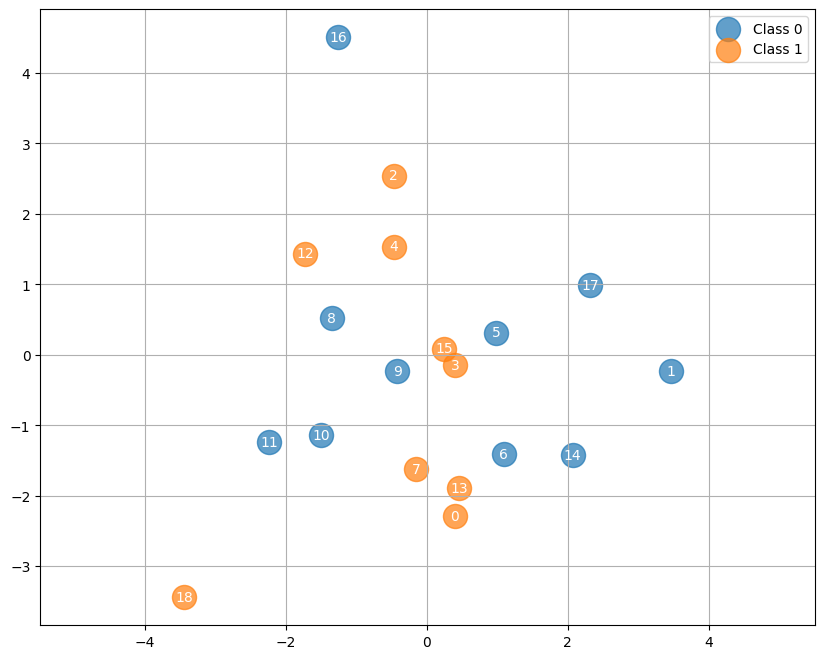

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from collections import defaultdict
import random

# we want non-linearly separable clusters

# Set fixed random seed for reproducibility
random_state = 42
rng = np.random.RandomState(random_state)

# Define centers: two clusters per class, so four total clusters
centers = [(-2, -1), (0, 2), (2, 0), (1, -2)]

# Each of the 4 clusters will belong to one of two classes
X, labels = make_blobs(n_samples=16, centers=centers, cluster_std=1.0, random_state=random_state)

# Map the 4 clusters to 2 classes
# For example: clusters 0 and 1 -> class 0; clusters 2 and 3 -> class 1
cluster_to_class = {0: 0, 1: 1, 2: 0, 3: 1}
y = np.array([cluster_to_class[i] for i in labels])

# Add uniform random noise (e.g., 20% of data size)
n_noise = int(0.2 * len(X))
noise = rng.uniform(low=-5, high=5, size=(n_noise, 2))
X = np.vstack([X, noise])
y = np.hstack([y, rng.randint(0, 2, size=n_noise)])  # random class for noise

print(len(X))


plot_points(X, y)

A vista: quitar 18,16 (ruido) y 11, 10, 14, 17, 1 (redundantes)

In [21]:
LSs, sorted_LSs_dict = compute_local_sets(X, y)
print(list(LSs.items())[:10])
print()
print(list(sorted_LSs_dict.items())[:10])

[(0, [0, 7, 13]), (1, [1, 5, 6, 14, 17]), (2, [2, 4, 12]), (3, [3, 15]), (4, [2, 4, 12]), (5, [5]), (6, [6]), (7, [0, 7, 13]), (8, [8]), (9, [9])]

[(5, [5]), (6, [6]), (8, [8]), (9, [9]), (12, [12]), (16, [16]), (18, [18]), (3, [3, 15]), (14, [6, 14]), (15, [3, 15])]


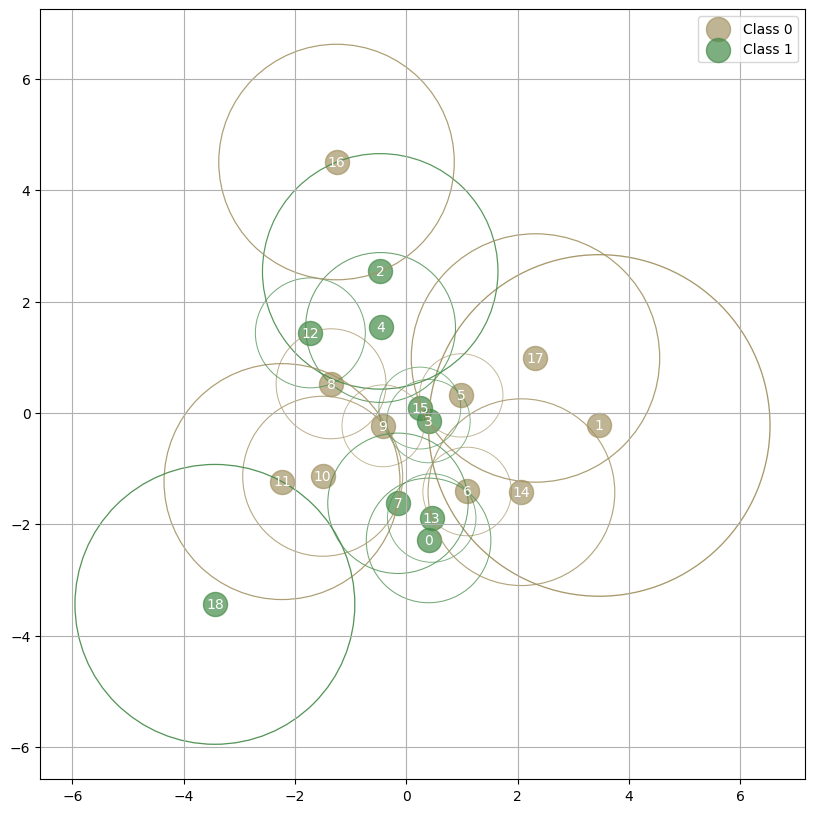

In [30]:
plot_local_sets(X,y,None)

In [35]:
kept_indices, noise_indices = local_set_based_smoother(X, y)
print(len(kept_indices))
print(len(noise_indices))
print(noise_indices)

15
4
[ 3  6  8 16]


Noise points: 4


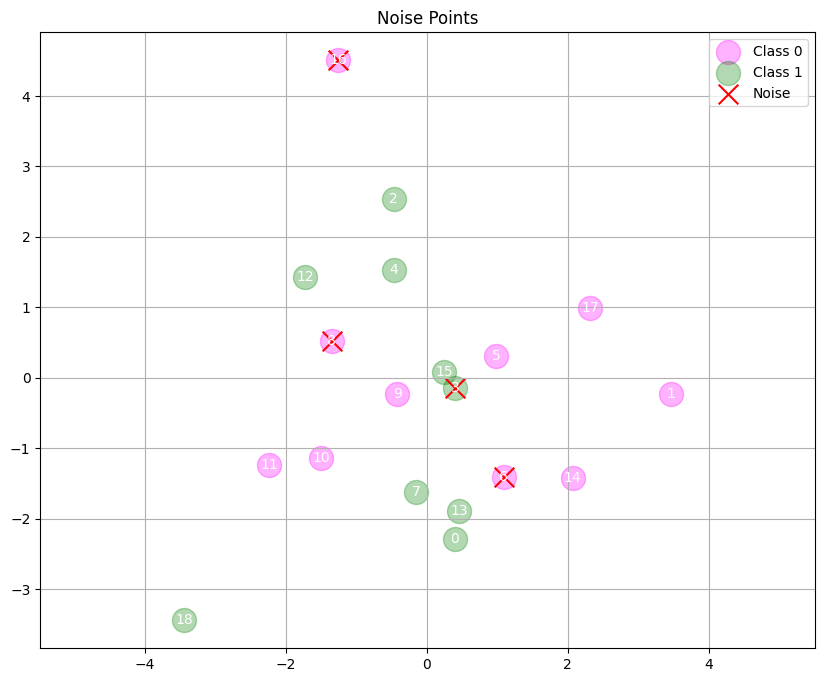

In [36]:
plot_noise(X, y, noise_indices)

In [48]:
LSs, sorted_LSs_dict = compute_local_sets(X, y, kept_indices)
print(list(LSs.items()))
print()
print(list(sorted_LSs_dict.items()))

[(0, [0, 7, 13]), (1, [1, 5, 14, 17]), (2, [2, 4, 12, 15]), (4, [2, 4, 12, 15]), (5, [5]), (7, [0, 7, 13]), (9, [9]), (10, [9, 10, 11]), (11, [9, 10, 11]), (12, [2, 4, 12]), (13, [0, 7, 13]), (14, [14]), (15, [15]), (17, [1, 5, 17]), (18, [18])]

[(5, [5]), (9, [9]), (14, [14]), (15, [15]), (18, [18]), (0, [0, 7, 13]), (7, [0, 7, 13]), (10, [9, 10, 11]), (11, [9, 10, 11]), (12, [2, 4, 12]), (13, [0, 7, 13]), (17, [1, 5, 17]), (1, [1, 5, 14, 17]), (2, [2, 4, 12, 15]), (4, [2, 4, 12, 15])]


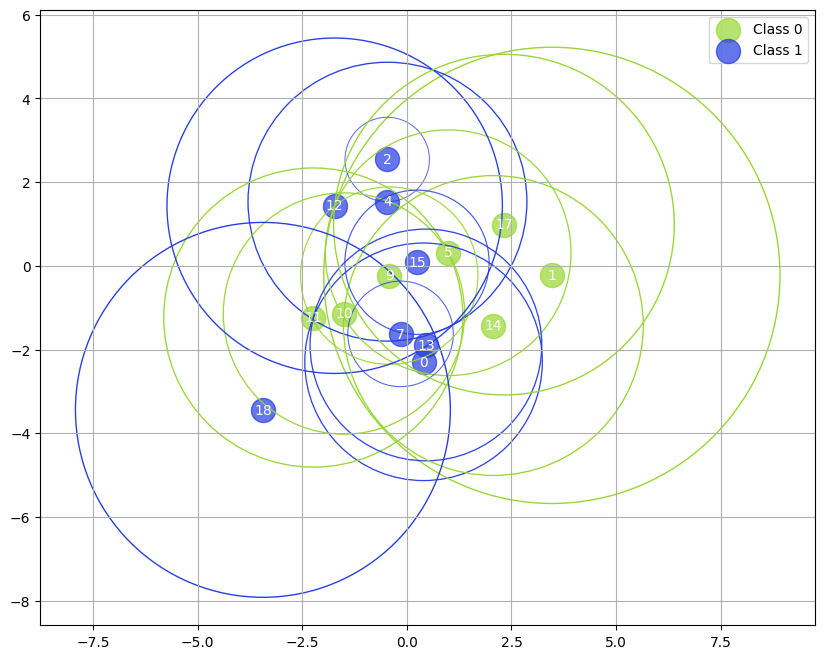

In [45]:
plot_local_sets(X,y,kept_indices)

In [40]:
borders_lsbo = local_set_border_selector(X, y, kept_indices)

print(len(borders_lsbo))
print(borders_lsbo)

7
[0, 5, 9, 12, 14, 15, 18]


Border points: 7


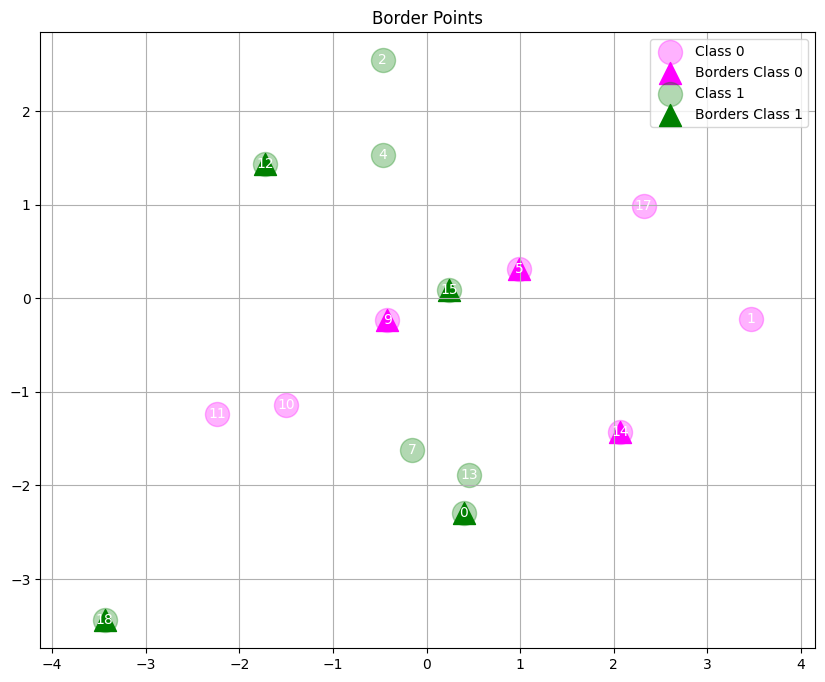

In [44]:
plot_borders(X, y, kept_indices, borders_lsbo)

In [50]:
central_indices = list(set(kept_indices.tolist()).difference(set(borders_lsbo)))
print(len(central_indices))
print(central_indices)

8
[1, 2, 4, 7, 10, 11, 13, 17]


In [51]:
LSs, sorted_LSs_dict = compute_local_sets(X, y, central_indices) 

print(len(LSs))
print(list(LSs.keys())[0:10])
print(list(LSs.values())[0:10])
print()
print(len(sorted_LSs_dict))
print(list(sorted_LSs_dict.keys())[0:10])
print(list(sorted_LSs_dict.values())[0:10])

8
[1, 2, 4, 7, 10, 11, 13, 17]
[[1, 17], [2, 4], [2, 4], [7, 13], [10, 11], [10, 11], [7, 13], [1, 17]]

8
[1, 2, 4, 7, 10, 11, 13, 17]
[[1, 17], [2, 4], [2, 4], [7, 13], [10, 11], [10, 11], [7, 13], [1, 17]]


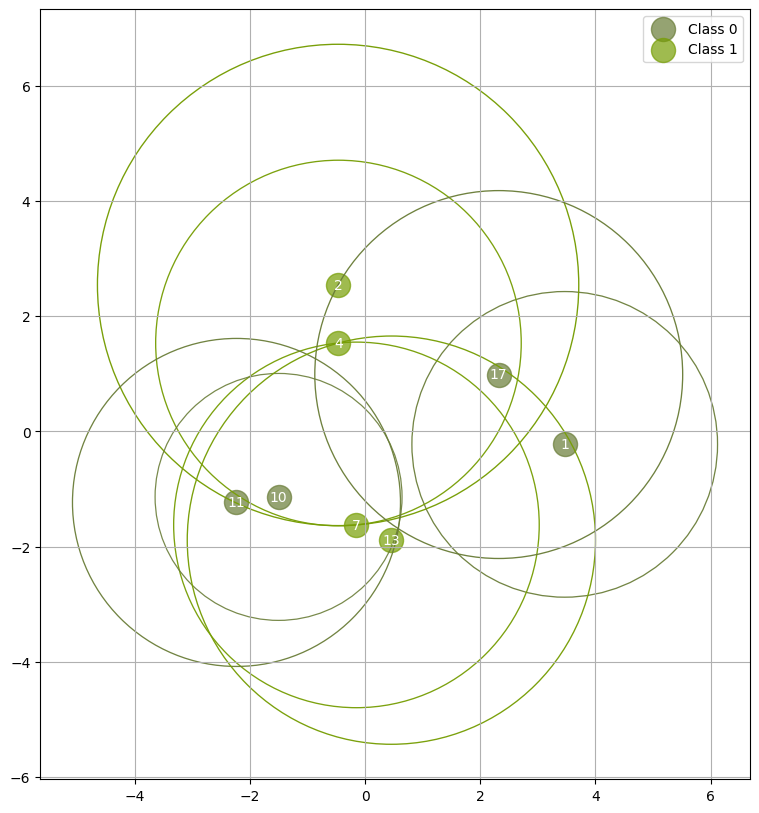

In [52]:
plot_local_sets(X,y,central_indices)

In [54]:
clusters_inverse = LS_based_clustering_inverse(sorted_LSs_dict, LSs)
print(len(clusters_inverse))
print(list(clusters_inverse.items())[:10])

4
[(1, [1, 17]), (2, [2, 4]), (7, [13, 7]), (10, [10, 11])]


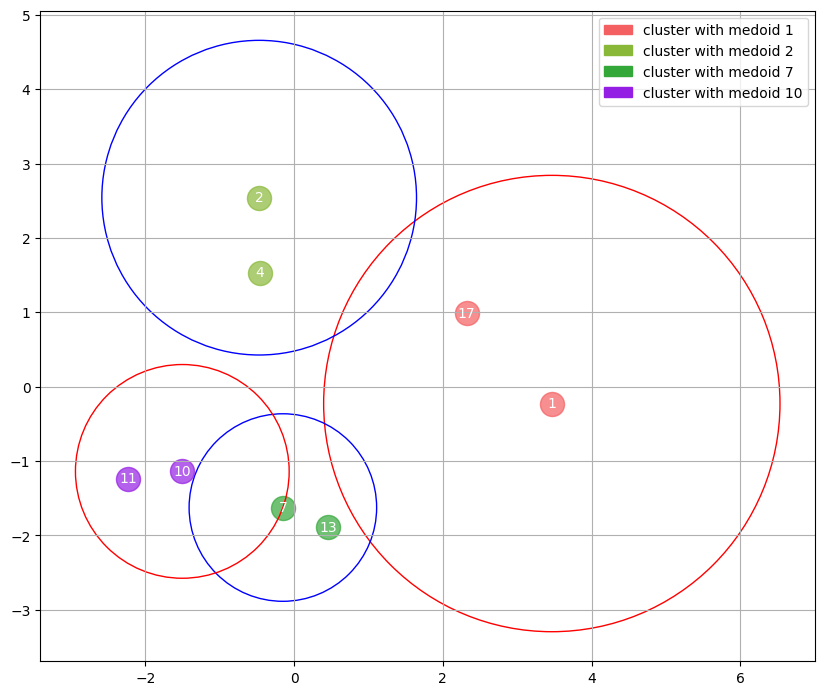

In [56]:
plot_clusters(clusters_inverse, X, y)

In [58]:
candidate_clusters = clusters_inverse
print(len(candidate_clusters))
centroids = compute_centroids(candidate_clusters, X)
print(list(centroids.items())[:10])

4
[(1, array([2.89279409, 0.38040427])), (2, array([-0.46644604,  2.03841515])), (7, array([ 0.15231185, -1.7566897 ])), (10, array([-1.86871961, -1.18620063]))]


In [59]:
%%time

border_dists, nearest_borders = compute_centroid_border_distances(centroids, X, y, borders_lsbo)
for cluster_id, dist in list(border_dists.items())[:10]:
    print(f"Cluster {cluster_id}: Nearest same-class border distance = {dist:.4f}")

print()
print(list(nearest_borders)[:10])

Cluster 1: Nearest same-class border distance = 1.9068
Cluster 2: Nearest same-class border distance = 1.3945
Cluster 7: Nearest same-class border distance = 0.5893
Cluster 10: Nearest same-class border distance = 1.7338

[1, 2, 7, 10]
CPU times: total: 0 ns
Wall time: 1.51 ms


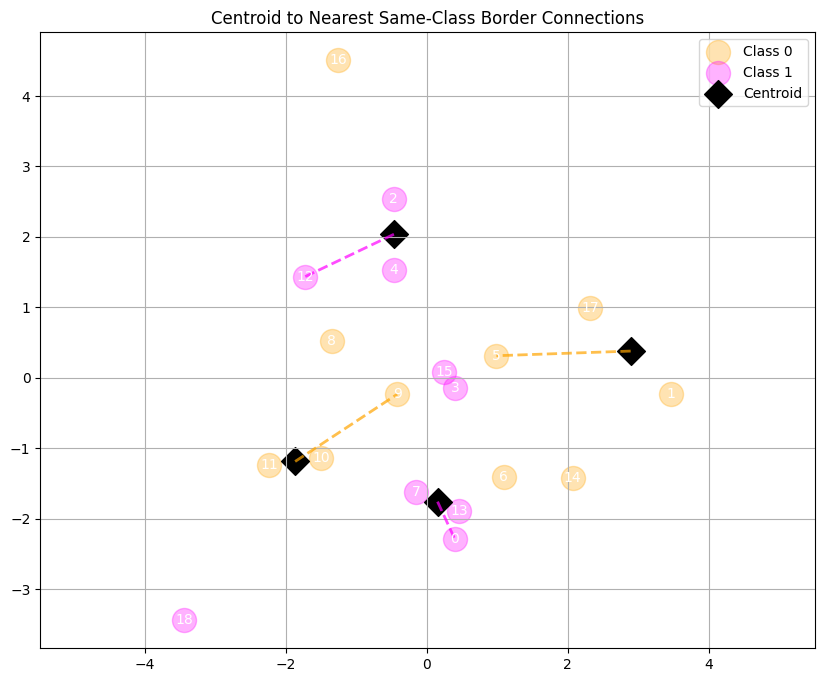

In [64]:
plot_centroids_and_borders(X, y, centroids, nearest_borders)

In [65]:
num_decision_variables = 150
size = min(len(candidate_clusters), num_decision_variables)
print(f'initial number of clusters: {len(candidate_clusters)} \nnumber of decision variables:{num_decision_variables} \nfinal size: {size}')

initial number of clusters: 4 
number of decision variables:150 
final size: 4


In [66]:
# We select the 150 clusters with the shortest distance to their nearest border

border_dist_map = list(border_dists.items())
print(border_dist_map[:10])
border_dist_map.sort(key=lambda x: x[1])
print(border_dist_map[:10])

preselected_clusters = list(map(lambda x: x[0], border_dist_map[:size]))
preselected_centroids = {k: centroids[k] for k in preselected_clusters if k in centroids}
print(list(preselected_centroids.items())[:10])

[(1, np.float64(1.906773241928437)), (2, np.float64(1.3944873455779374)), (7, np.float64(0.5892900591495563)), (10, np.float64(1.7337614333433935))]
[(7, np.float64(0.5892900591495563)), (2, np.float64(1.3944873455779374)), (10, np.float64(1.7337614333433935)), (1, np.float64(1.906773241928437))]
[(7, array([ 0.15231185, -1.7566897 ])), (2, array([-0.46644604,  2.03841515])), (10, array([-1.86871961, -1.18620063])), (1, array([2.89279409, 0.38040427]))]


In [68]:
Q, cluster_ids = build_qubo_matrix(
    preselected_centroids,
    border_dists,
    y,
    alpha=1.0,  # penalty
    beta=1.0,   # reward
    T=0.2,      # high values make it more difficult for same class rewards
    self_bias=-1.0
)

print(Q)

[[ 4.          4.73993662 -5.         -5.        ]
 [ 4.73993662  4.         -5.         -5.        ]
 [-5.         -5.          4.          4.80050319]
 [-5.         -5.          4.80050319  4.        ]]


In [71]:
%%time

solution, energy = brute_force_qubo(Q)

print("Best solution (binary vector):", solution)
print("Minimum energy:", energy)

Best solution (binary vector): [1 1 1 1]
Minimum energy: -4.919120384179239
CPU times: total: 0 ns
Wall time: 1 ms


In [78]:
selected_cluster_ids = []
for i, val in enumerate(solution):
    if val==1:
       selected_cluster_ids.append(list(preselected_centroids.items())[i][0]) 

print(selected_cluster_ids)

[7, 2, 10, 1]


Selected cluster points (non-borders): 8
Border points: 7
Noise points: 4


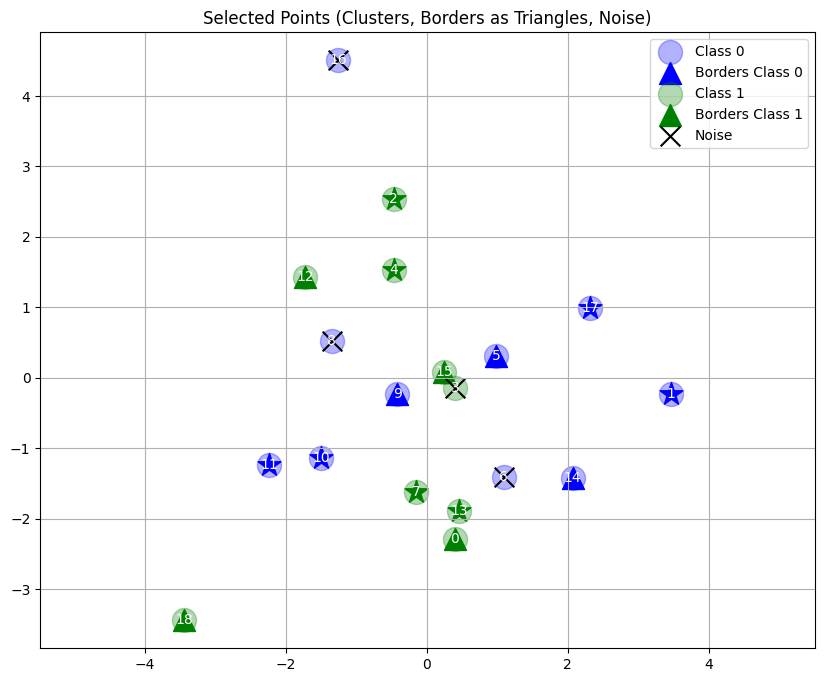

In [79]:
plot_selected_instances(X, y, clusters_inverse, selected_cluster_ids, borders_lsbo, noise_indices)

## Example 2

24


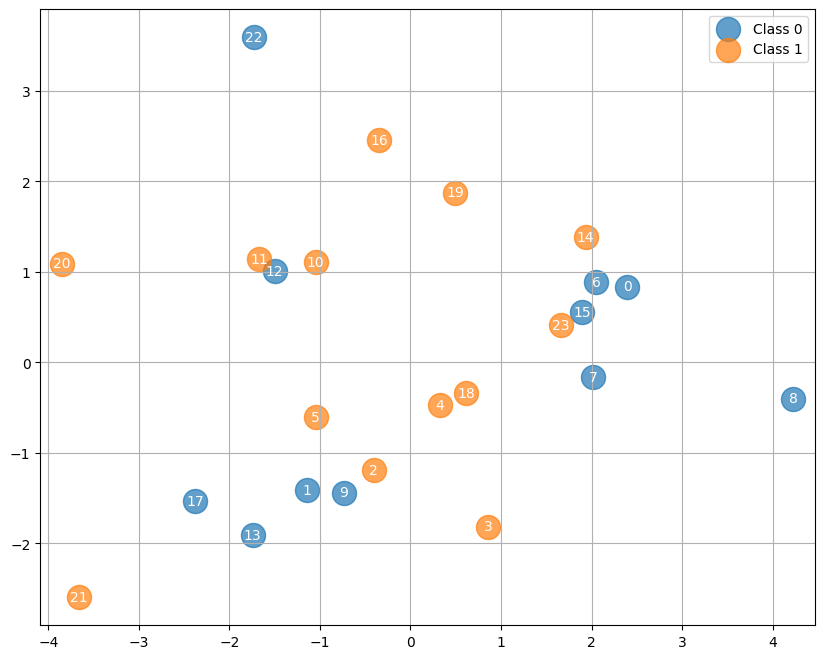

In [81]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from collections import defaultdict
import random

# we want non-linearly separable clusters

# Set fixed random seed for reproducibility
random_state = 43
rng = np.random.RandomState(random_state)

# Define centers: two clusters per class, so four total clusters
centers = [(-2, -1), (0, 2), (2, 0), (1, -2)]

# Each of the 4 clusters will belong to one of two classes
X, labels = make_blobs(n_samples=20, centers=centers, cluster_std=1.0, random_state=random_state)

# Map the 4 clusters to 2 classes
# For example: clusters 0 and 1 -> class 0; clusters 2 and 3 -> class 1
cluster_to_class = {0: 0, 1: 1, 2: 0, 3: 1}
y = np.array([cluster_to_class[i] for i in labels])

# Add uniform random noise (e.g., 20% of data size)
n_noise = int(0.2 * len(X))
noise = rng.uniform(low=-5, high=5, size=(n_noise, 2))
X = np.vstack([X, noise])
y = np.hstack([y, rng.randint(0, 2, size=n_noise)])  # random class for noise

print(len(X))


plot_points(X, y)

A vista: quitar 12,20,21,22 (ruido) y 4,18,19 (redundantes)

In [82]:
LSs, sorted_LSs_dict = compute_local_sets(X, y)
print(list(LSs.items())[:10])
print()
print(list(sorted_LSs_dict.items())[:10])

[(0, [0, 6, 15]), (1, [1, 9]), (2, [2]), (3, [2, 3, 4, 18]), (4, [2, 4, 5, 18]), (5, [5]), (6, [0, 6, 15]), (7, [7]), (8, [0, 6, 7, 8, 15]), (9, [1, 9])]

[(2, [2]), (5, [5]), (7, [7]), (10, [10]), (11, [11]), (12, [12]), (14, [14]), (15, [15]), (21, [21]), (22, [22])]


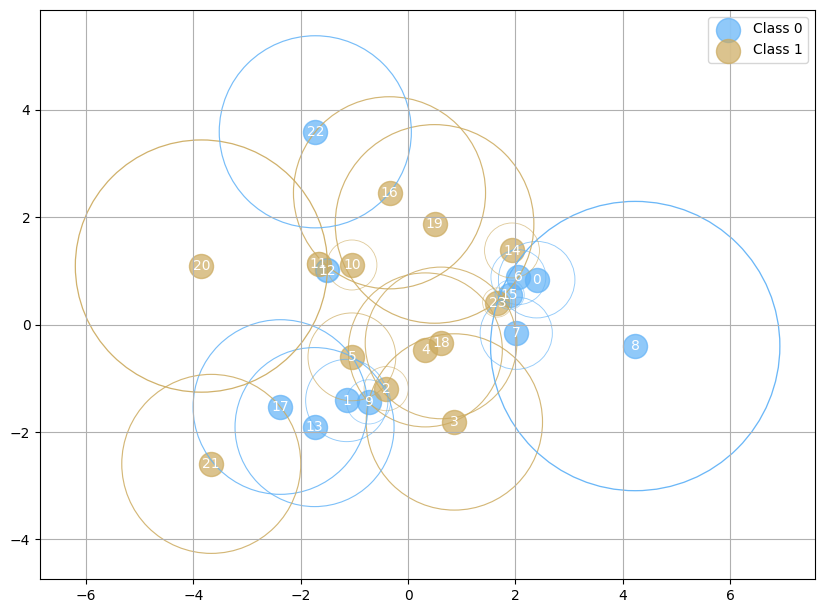

In [84]:
plot_local_sets(X,y,None)

In [85]:
kept_indices, noise_indices = local_set_based_smoother(X, y)
print(len(kept_indices))
print(len(noise_indices))
print(noise_indices)

18
6
[ 5  9 12 14 22 23]


Noise points: 6


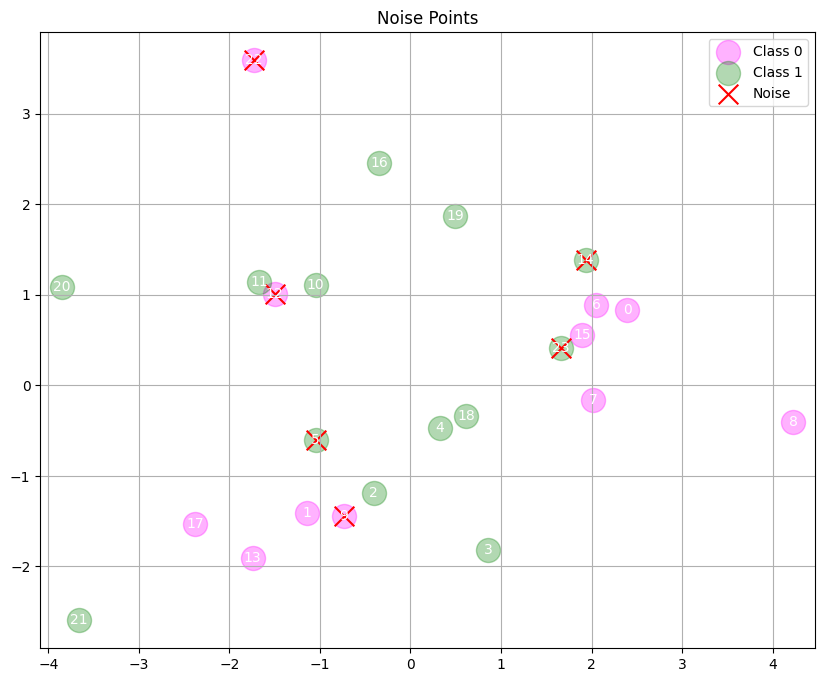

In [86]:
plot_noise(X, y, noise_indices)

In [89]:
borders_lsbo = local_set_border_selector(X, y, kept_indices)

print(len(borders_lsbo))
print(borders_lsbo)

6
[0, 1, 2, 19, 20, 21]


Border points: 6


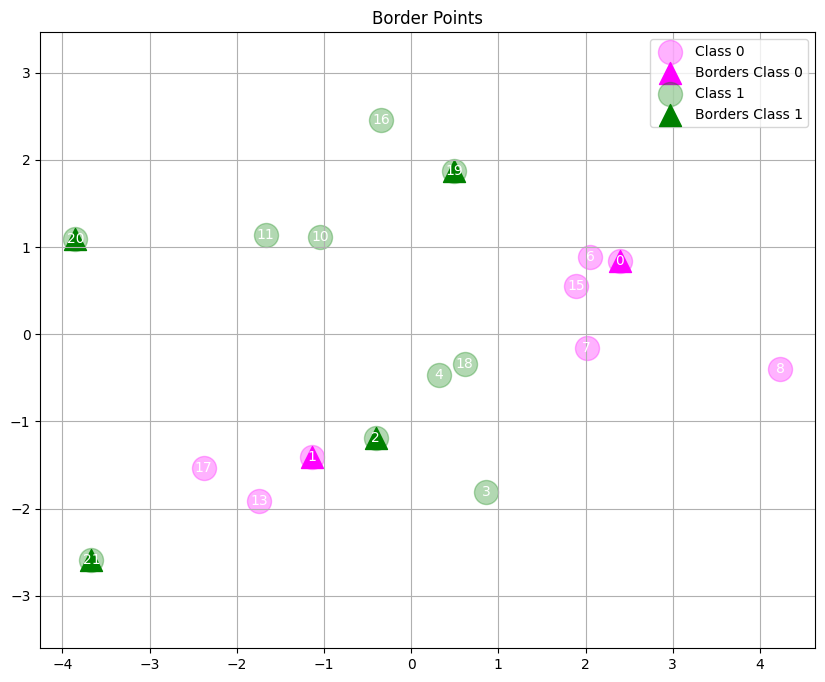

In [91]:
plot_borders(X, y, kept_indices, borders_lsbo)

In [92]:
central_indices = list(set(kept_indices.tolist()).difference(set(borders_lsbo)))
print(len(central_indices))
print(central_indices)

12
[3, 4, 6, 7, 8, 10, 11, 13, 15, 16, 17, 18]


In [93]:
LSs, sorted_LSs_dict = compute_local_sets(X, y, central_indices) 

print(len(LSs))
print(list(LSs.keys())[0:10])
print(list(LSs.values())[0:10])
print()
print(len(sorted_LSs_dict))
print(list(sorted_LSs_dict.keys())[0:10])
print(list(sorted_LSs_dict.values())[0:10])

12
[3, 4, 6, 7, 8, 10, 11, 13, 15, 16]
[[3, 4, 18], [3, 4, 18], [6, 7, 15], [6, 7, 15], [6, 7, 8, 15], [4, 10, 11, 16, 18], [4, 10, 11, 16, 18], [13, 17], [6, 7, 15], [10, 11, 16]]

12
[13, 17, 18, 3, 4, 6, 7, 15, 16, 8]
[[13, 17], [13, 17], [4, 18], [3, 4, 18], [3, 4, 18], [6, 7, 15], [6, 7, 15], [6, 7, 15], [10, 11, 16], [6, 7, 8, 15]]


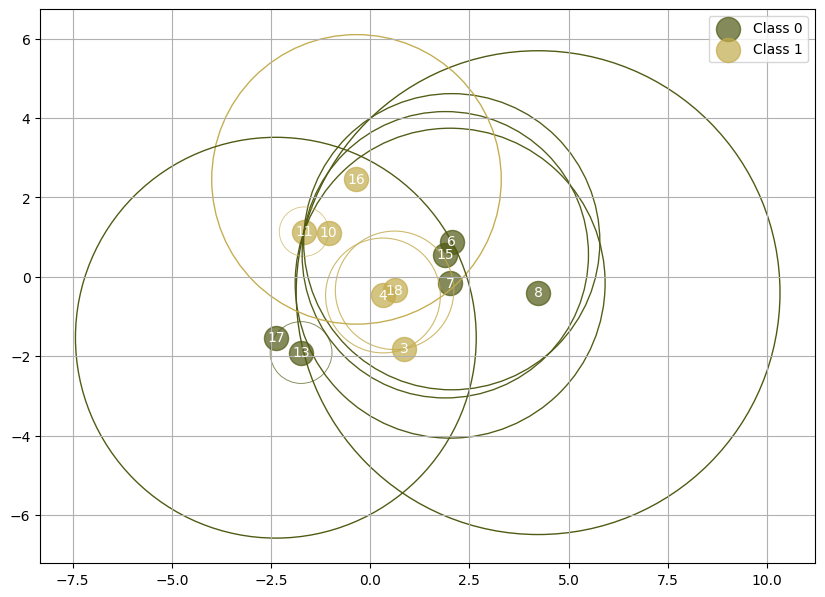

In [94]:
plot_local_sets(X,y,central_indices)

In [95]:
clusters_inverse = LS_based_clustering_inverse(sorted_LSs_dict, LSs)
print(len(clusters_inverse))
print(list(clusters_inverse.items())[:10])

6
[(13, [17, 13]), (18, [18, 4]), (3, [3]), (6, [7, 6, 15]), (16, [16, 10, 11]), (8, [8])]


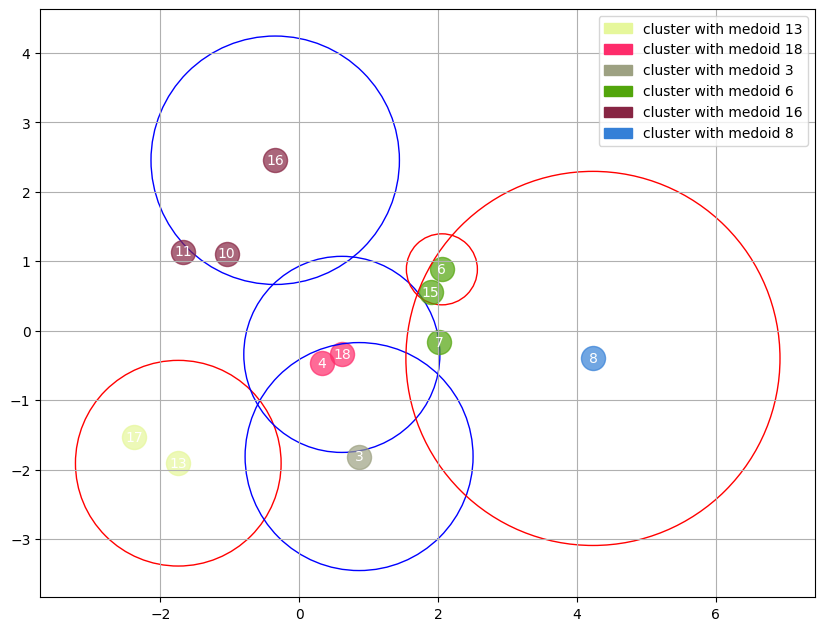

In [96]:
plot_clusters(clusters_inverse, X, y)

In [97]:
candidate_clusters = clusters_inverse
print(len(candidate_clusters))
centroids = compute_centroids(candidate_clusters, X)
print(list(centroids.items())[:10])

6
[(13, array([-2.06055159, -1.72169852])), (18, array([ 0.46716737, -0.40598307])), (3, array([ 0.86171636, -1.81282141])), (6, array([1.98683485, 0.4263197 ])), (16, array([-1.02064653,  1.56787219])), (8, array([ 4.23035965, -0.39911572]))]


In [98]:
%%time

border_dists, nearest_borders = compute_centroid_border_distances(centroids, X, y, borders_lsbo)
for cluster_id, dist in list(border_dists.items())[:10]:
    print(f"Cluster {cluster_id}: Nearest same-class border distance = {dist:.4f}")

print()
print(list(nearest_borders)[:10])

Cluster 13: Nearest same-class border distance = 0.9691
Cluster 18: Nearest same-class border distance = 1.1763
Cluster 3: Nearest same-class border distance = 1.4132
Cluster 6: Nearest same-class border distance = 0.5791
Cluster 16: Nearest same-class border distance = 1.5445
Cluster 8: Nearest same-class border distance = 2.2130

[13, 18, 3, 6, 16, 8]
CPU times: total: 15.6 ms
Wall time: 2.88 ms


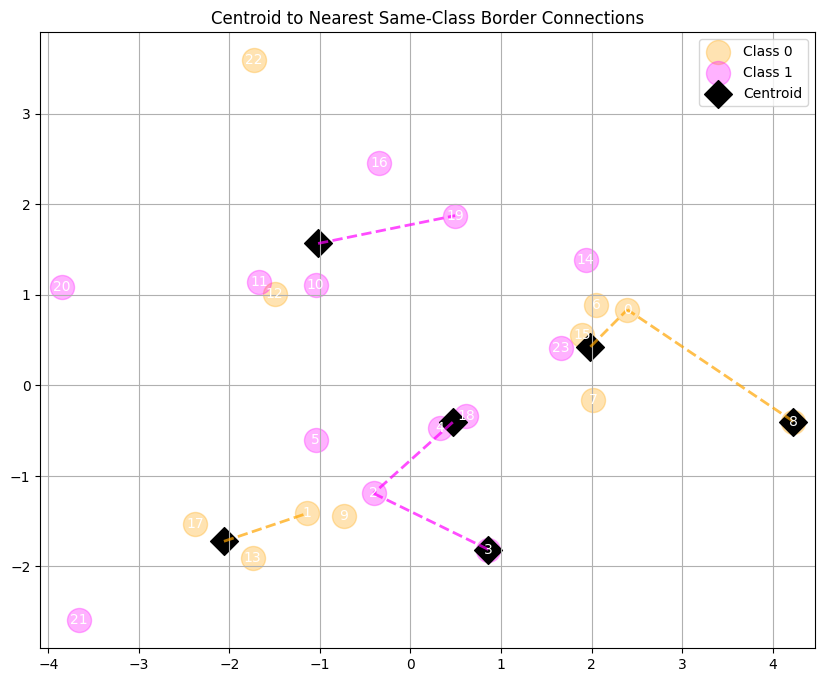

In [99]:
plot_centroids_and_borders(X, y, centroids, nearest_borders)

In [100]:
num_decision_variables = 150
size = min(len(candidate_clusters), num_decision_variables)
print(f'initial number of clusters: {len(candidate_clusters)} \nnumber of decision variables:{num_decision_variables} \nfinal size: {size}')

initial number of clusters: 6 
number of decision variables:150 
final size: 6


In [101]:
# We select the 150 clusters with the shortest distance to their nearest border

border_dist_map = list(border_dists.items())
print(border_dist_map[:10])
border_dist_map.sort(key=lambda x: x[1])
print(border_dist_map[:10])

preselected_clusters = list(map(lambda x: x[0], border_dist_map[:size]))
preselected_centroids = {k: centroids[k] for k in preselected_clusters if k in centroids}
print(list(preselected_centroids.items())[:10])

[(13, np.float64(0.9691028761284287)), (18, np.float64(1.1763350151548144)), (3, np.float64(1.4131887831893646)), (6, np.float64(0.5790935417966002)), (16, np.float64(1.544540593582586)), (8, np.float64(2.2130017482032973))]
[(6, np.float64(0.5790935417966002)), (13, np.float64(0.9691028761284287)), (18, np.float64(1.1763350151548144)), (3, np.float64(1.4131887831893646)), (16, np.float64(1.544540593582586)), (8, np.float64(2.2130017482032973))]
[(6, array([1.98683485, 0.4263197 ])), (13, array([-2.06055159, -1.72169852])), (18, array([ 0.46716737, -0.40598307])), (3, array([ 0.86171636, -1.81282141])), (16, array([-1.02064653,  1.56787219])), (8, array([ 4.23035965, -0.39911572]))]


In [102]:
Q, cluster_ids = build_qubo_matrix(
    preselected_centroids,
    border_dists,
    y,
    alpha=1.0,  # penalty
    beta=1.0,   # reward
    T=0.2,      # high values make it more difficult for same class rewards
    self_bias=-1.0
)

print(Q)

[[ 4.          4.78175783 -5.         -5.         -5.          5.41831295]
 [ 4.78175783  4.         -5.         -5.         -5.          4.84444119]
 [-5.         -5.          4.          5.6844074   5.40456664 -5.        ]
 [-5.         -5.          5.6844074   4.          4.74156313 -5.        ]
 [-5.         -5.          5.40456664  4.74156313  4.         -5.        ]
 [ 5.41831295  4.84444119 -5.         -5.         -5.          4.        ]]


In [103]:
%%time

solution, energy = brute_force_qubo(Q)

print("Best solution (binary vector):", solution)
print("Minimum energy:", energy)

Best solution (binary vector): [1 1 0 1 1 0]
Minimum energy: -4.95335807861121
CPU times: total: 0 ns
Wall time: 520 μs


In [104]:
selected_cluster_ids = []
for i, val in enumerate(solution):
    if val==1:
       selected_cluster_ids.append(list(preselected_centroids.items())[i][0]) 

print(selected_cluster_ids)

[6, 13, 3, 16]


Selected cluster points (non-borders): 9
Border points: 6
Noise points: 6


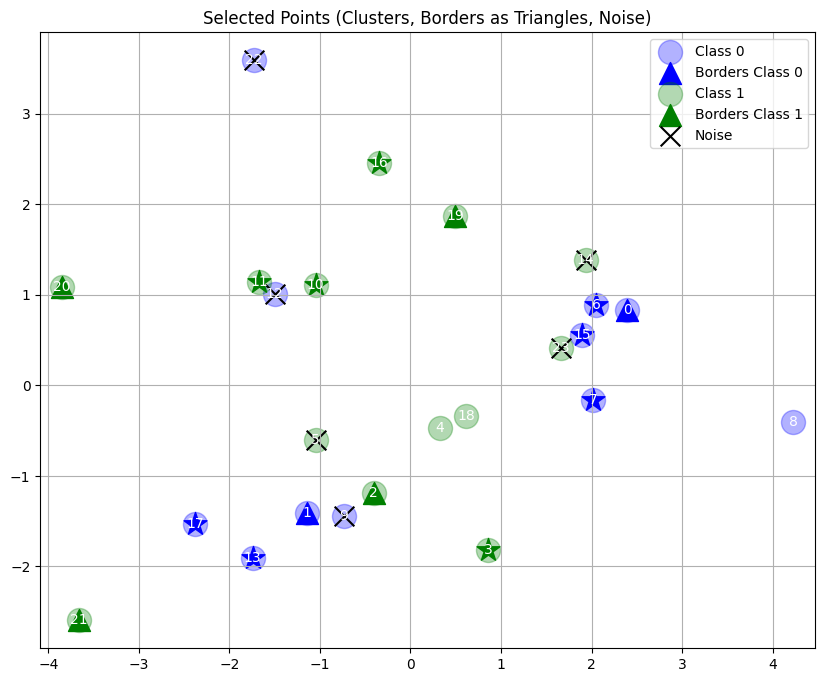

In [105]:
plot_selected_instances(X, y, clusters_inverse, selected_cluster_ids, borders_lsbo, noise_indices)

## Example 3

28


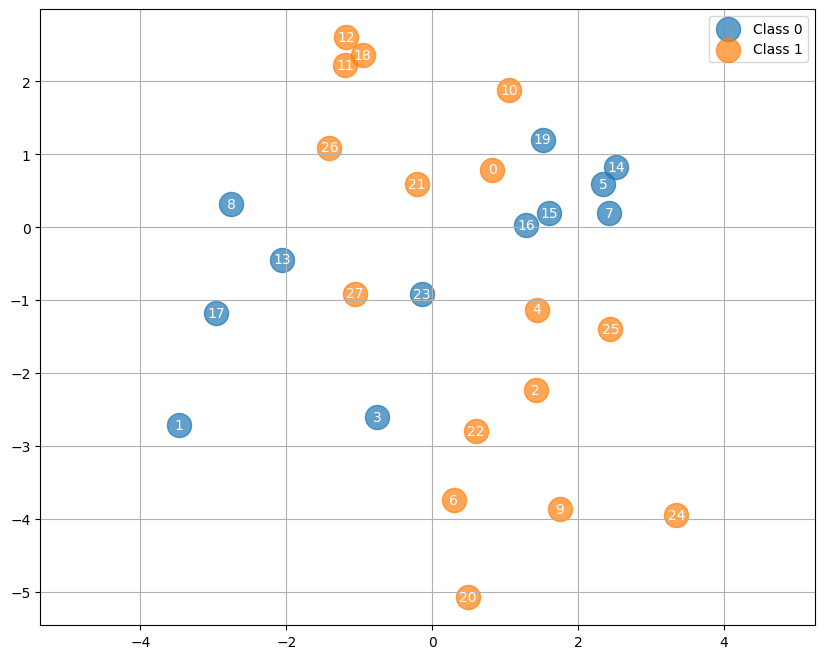

In [107]:
# we want non-linearly separable clusters

# Set fixed random seed for reproducibility
random_state = 44
rng = np.random.RandomState(random_state)

# Define centers: two clusters per class, so four total clusters
centers = [(-2, -1), (0, 2), (2, 0), (1, -2)]

# Each of the 4 clusters will belong to one of two classes
X, labels = make_blobs(n_samples=24, centers=centers, cluster_std=1.0, random_state=random_state)

# Map the 4 clusters to 2 classes
# For example: clusters 0 and 1 -> class 0; clusters 2 and 3 -> class 1
cluster_to_class = {0: 0, 1: 1, 2: 0, 3: 1}
y = np.array([cluster_to_class[i] for i in labels])

# Add uniform random noise (e.g., 20% of data size)
n_noise = int(0.2 * len(X))
noise = rng.uniform(low=-5, high=5, size=(n_noise, 2))
X = np.vstack([X, noise])
y = np.hstack([y, rng.randint(0, 2, size=n_noise)])  # random class for noise

print(len(X))


plot_points(X, y)

A vista: quitar 27 (ruido) y 20,9,24,5,14,... (redundantes)

In [108]:
LSs, sorted_LSs_dict = compute_local_sets(X, y)
print(list(LSs.items())[:10])
print()
print(list(sorted_LSs_dict.items())[:10])

[(0, [0]), (1, [1, 3, 13, 17]), (2, [2, 4, 6, 9, 22, 25]), (3, [3]), (4, [2, 4, 25]), (5, [5, 7, 14, 15, 16, 19]), (6, [6, 9, 20, 22]), (7, [5, 7, 14, 15, 16, 19]), (8, [8, 13, 17]), (9, [2, 4, 6, 9, 20, 22, 24, 25])]

[(0, [0]), (3, [3]), (10, [10]), (19, [19]), (23, [23]), (27, [27]), (13, [8, 13]), (16, [15, 16]), (4, [2, 4, 25]), (8, [8, 13, 17])]


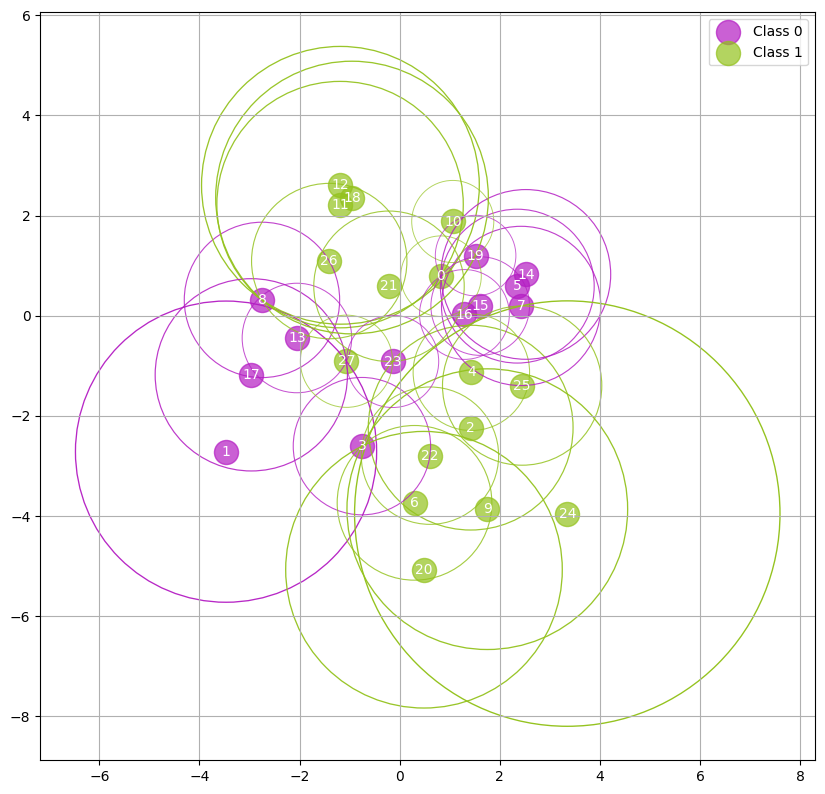

In [109]:
plot_local_sets(X,y,None)

In [110]:
kept_indices, noise_indices = local_set_based_smoother(X, y)
print(len(kept_indices))
print(len(noise_indices))
print(noise_indices)

23
5
[ 0  3  8 23 27]


Noise points: 5


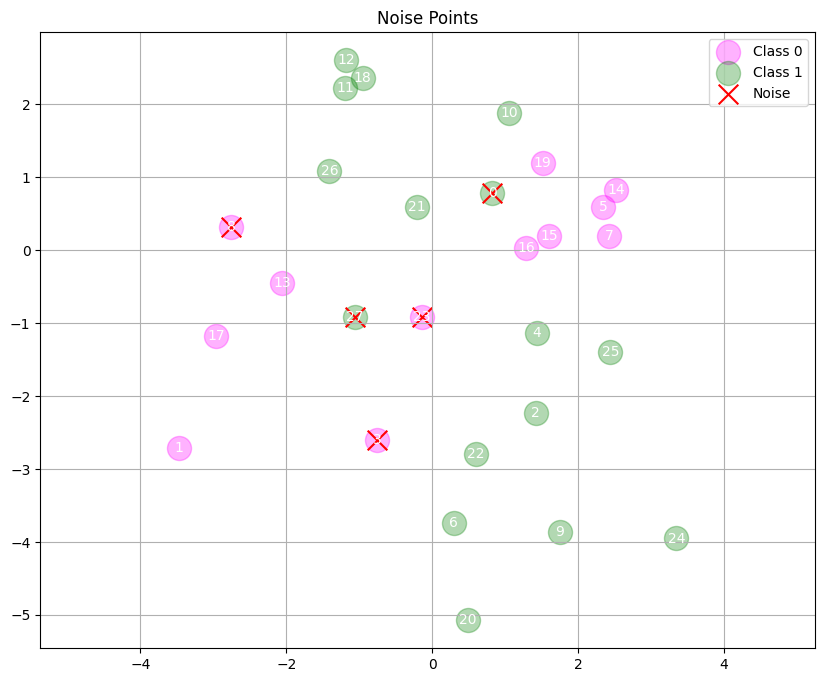

In [111]:
plot_noise(X, y, noise_indices)

In [112]:
borders_lsbo = local_set_border_selector(X, y, kept_indices)

print(len(borders_lsbo))
print(borders_lsbo)

6
[4, 10, 13, 16, 19, 21]


Border points: 6


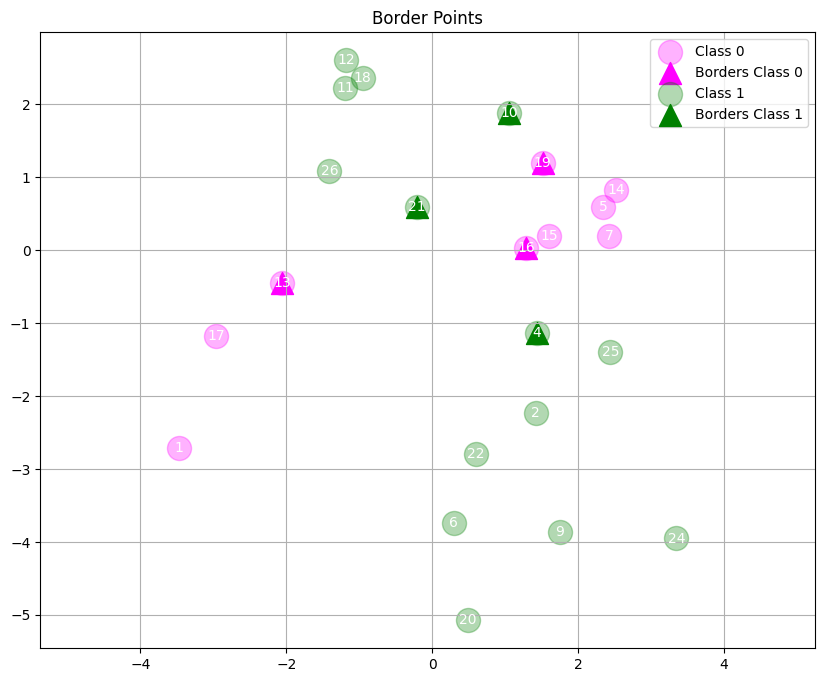

In [113]:
plot_borders(X, y, kept_indices, borders_lsbo)

In [114]:
central_indices = list(set(kept_indices.tolist()).difference(set(borders_lsbo)))
print(len(central_indices))
print(central_indices)

17
[1, 2, 5, 6, 7, 9, 11, 12, 14, 15, 17, 18, 20, 22, 24, 25, 26]


In [115]:
LSs, sorted_LSs_dict = compute_local_sets(X, y, central_indices) 

print(len(LSs))
print(list(LSs.keys())[0:10])
print(list(LSs.values())[0:10])
print()
print(len(sorted_LSs_dict))
print(list(sorted_LSs_dict.keys())[0:10])
print(list(sorted_LSs_dict.values())[0:10])

17
[1, 2, 5, 6, 7, 9, 11, 12, 14, 15]
[[1, 17], [2, 6, 9, 22, 25], [5, 7, 14, 15], [2, 6, 9, 20, 22, 24, 25], [5, 7, 14, 15], [2, 6, 9, 20, 22, 24, 25], [11, 12, 18, 26], [11, 12, 18, 26], [5, 7, 14, 15], [5, 7, 14, 15]]

17
[1, 17, 25, 5, 7, 11, 12, 14, 15, 18]
[[1, 17], [1, 17], [2, 25], [5, 7, 14, 15], [5, 7, 14, 15], [11, 12, 18, 26], [11, 12, 18, 26], [5, 7, 14, 15], [5, 7, 14, 15], [11, 12, 18, 26]]


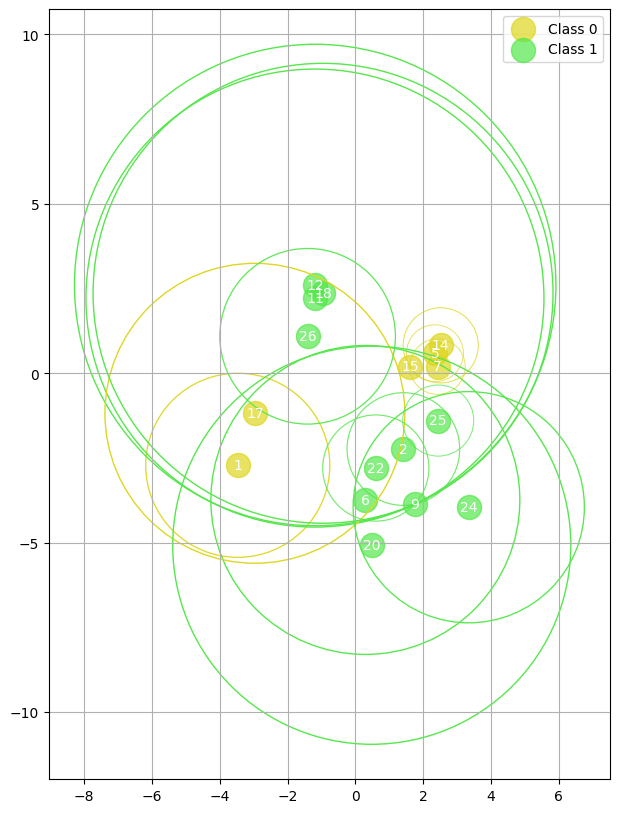

In [116]:
plot_local_sets(X,y,central_indices)

In [117]:
clusters_inverse = LS_based_clustering_inverse(sorted_LSs_dict, LSs)
print(len(clusters_inverse))
print(list(clusters_inverse.items())[:10])

5
[(1, [1, 17]), (25, [25, 2]), (5, [7, 5, 14, 15]), (11, [11, 26, 18, 12]), (6, [6, 9, 20, 22, 24])]


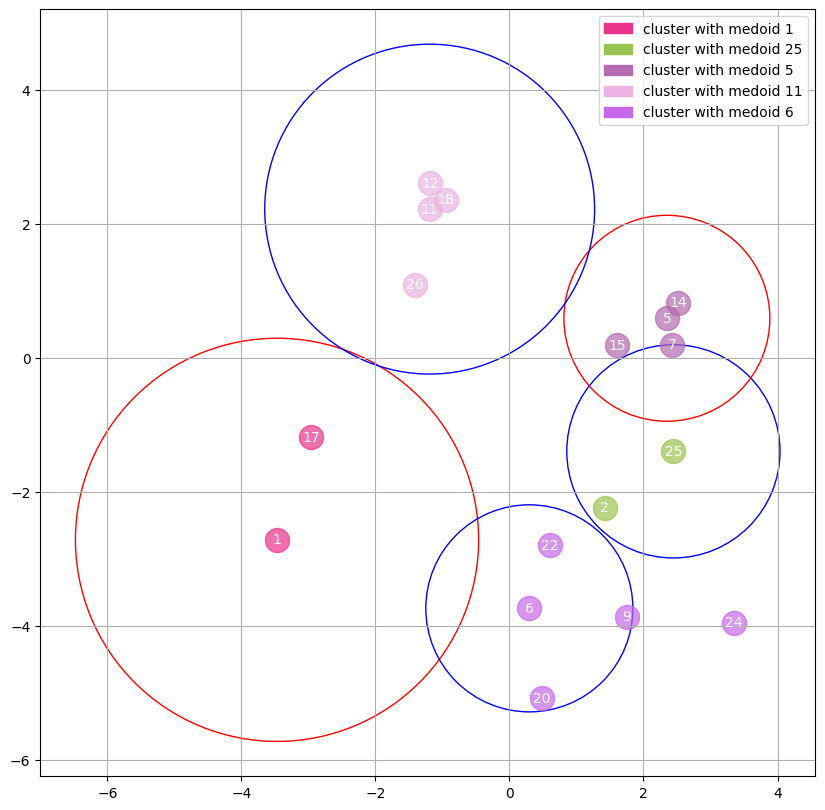

In [118]:
plot_clusters(clusters_inverse, X, y)

In [119]:
candidate_clusters = clusters_inverse
print(len(candidate_clusters))
centroids = compute_centroids(candidate_clusters, X)
print(list(centroids.items())[:10])

5
[(1, array([-3.21577369, -1.94769596])), (25, array([ 1.9324579 , -1.81516274])), (5, array([2.22619404, 0.45129748])), (11, array([-1.18311374,  2.0696394 ])), (6, array([ 1.2973514 , -3.88449456]))]


In [120]:
%%time

border_dists, nearest_borders = compute_centroid_border_distances(centroids, X, y, borders_lsbo)
for cluster_id, dist in list(border_dists.items())[:10]:
    print(f"Cluster {cluster_id}: Nearest same-class border distance = {dist:.4f}")

print()
print(list(nearest_borders)[:10])

Cluster 1: Nearest same-class border distance = 1.9008
Cluster 25: Nearest same-class border distance = 0.8486
Cluster 5: Nearest same-class border distance = 1.0248
Cluster 11: Nearest same-class border distance = 1.7706
Cluster 6: Nearest same-class border distance = 2.7581

[1, 25, 5, 11, 6]
CPU times: total: 0 ns
Wall time: 2.39 ms


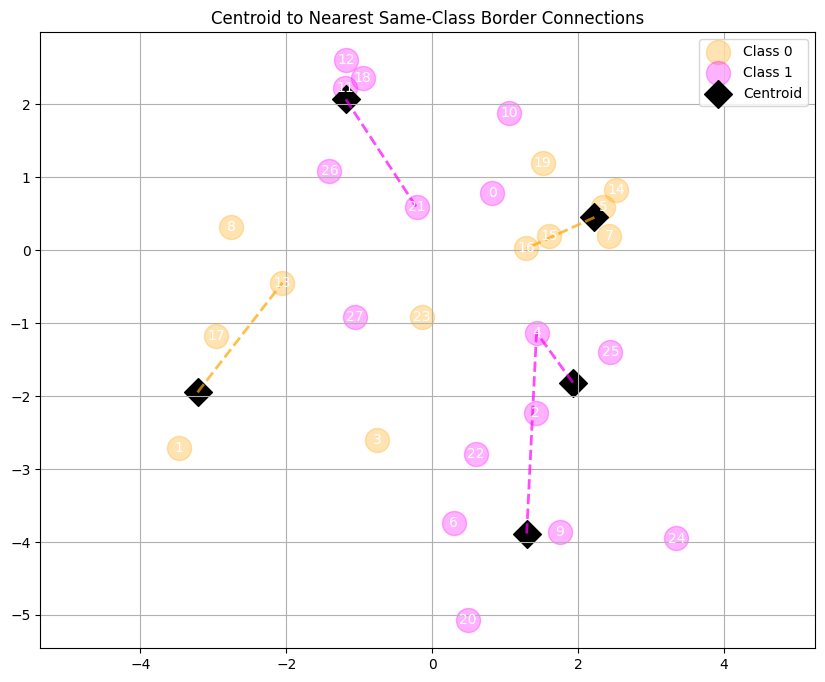

In [121]:
plot_centroids_and_borders(X, y, centroids, nearest_borders)

In [122]:
num_decision_variables = 150
size = min(len(candidate_clusters), num_decision_variables)
print(f'initial number of clusters: {len(candidate_clusters)} \nnumber of decision variables:{num_decision_variables} \nfinal size: {size}')

initial number of clusters: 5 
number of decision variables:150 
final size: 5


In [123]:
# We select the 150 clusters with the shortest distance to their nearest border

border_dist_map = list(border_dists.items())
print(border_dist_map[:10])
border_dist_map.sort(key=lambda x: x[1])
print(border_dist_map[:10])

preselected_clusters = list(map(lambda x: x[0], border_dist_map[:size]))
preselected_centroids = {k: centroids[k] for k in preselected_clusters if k in centroids}
print(list(preselected_centroids.items())[:10])

[(1, np.float64(1.9008240841100539)), (25, np.float64(0.8486453622509338)), (5, np.float64(1.024789487025407)), (11, np.float64(1.770606948349432)), (6, np.float64(2.758080437882652))]
[(25, np.float64(0.8486453622509338)), (5, np.float64(1.024789487025407)), (11, np.float64(1.770606948349432)), (1, np.float64(1.9008240841100539)), (6, np.float64(2.758080437882652))]
[(25, array([ 1.9324579 , -1.81516274])), (5, array([2.22619404, 0.45129748])), (11, array([-1.18311374,  2.0696394 ])), (1, array([-3.21577369, -1.94769596])), (6, array([ 1.2973514 , -3.88449456]))]


In [124]:
Q, cluster_ids = build_qubo_matrix(
    preselected_centroids,
    border_dists,
    y,
    alpha=1.0,  # penalty
    beta=1.0,   # reward
    T=0.2,      # high values make it more difficult for same class rewards
    self_bias=-1.0
)

print(Q)

[[ 4.         -5.          4.79918903 -5.          5.46197884]
 [-5.          4.         -5.          4.83185604 -5.        ]
 [ 4.79918903 -5.          4.         -5.          4.84496484]
 [-5.          4.83185604 -5.          4.         -5.        ]
 [ 5.46197884 -5.          4.84496484 -5.          4.        ]]


In [125]:
%%time

solution, energy = brute_force_qubo(Q)

print("Best solution (binary vector):", solution)
print("Minimum energy:", energy)

Best solution (binary vector): [1 1 1 1 0]
Minimum energy: -4.737909863248046
CPU times: total: 0 ns
Wall time: 0 ns


In [126]:
selected_cluster_ids = []
for i, val in enumerate(solution):
    if val==1:
       selected_cluster_ids.append(list(preselected_centroids.items())[i][0]) 

print(selected_cluster_ids)

[25, 5, 11, 1]


Selected cluster points (non-borders): 12
Border points: 6
Noise points: 5


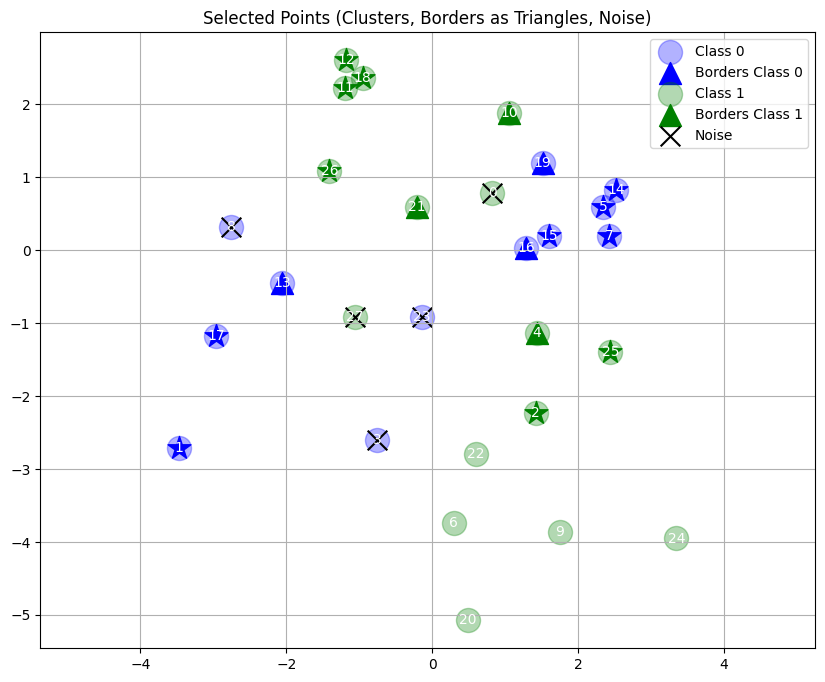

In [127]:
plot_selected_instances(X, y, clusters_inverse, selected_cluster_ids, borders_lsbo, noise_indices)